# Visualization (시각화)
> 데이터분석 및 보고에 필요한 시각화 패키지를 알아보고 실제 데이터로 시각화 예제를 다루어봅니다.  
데이터 시각화는 데이터분석 과정에서 단순히 데이터를 살펴보는데 그치지 않고 다양한 분석 가능성을 보여줍니다.  
또한 3자에게 설명을 함에 있어서도 데이터시각화는 굉장히 설득력있는 리포팅을 가능하게 해줍니다.

## **Matplotlib**
> 파이썬의 대표적인 시각화 패키지  
패키지의 이름에서 느껴지듯 MATLAB의 수리데이터 시각화를 파이썬으로 옮겨온 컨셉  
기본적인 형태의 다양한 시각화 함수를 제공  
사용이 약간은 불편  

### matplotlib 설치 및 불러오기

In [232]:
# !pip install matplotlib
# matlab 사용자의 시각화 도구 사용가능
# 분석에 사용가능한 여러가지 시각화 함수를 제공합니다. 보통 plt라는 예명으로 사용합니다.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


%matplotlib inline 
# 주피터 노트북에 최적화 된 그래프 설정(코랩 사용불가)

%matplotlib notebook 
# 인터렉티브 그래프 가능(코랩 사용불가)

### 코랩 시각화 한글 폰트 사용

In [ ]:
# 코랩
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf
# 런타임 재시작

### 윈도우 한글 폰트 사용 
네이버에서 배포하는 나눔바른고딕체 설치 필요  
[https://hangeul.naver.com/font](https://hangeul.naver.com/font)

In [89]:
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    f_path = '/Library/Fonts/Arial Unicode.ttf'
elif platform.system() == 'Windows':
    f_path = 'c:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

print('Hangul font is set!')

Hangul font is set!


In [18]:
# family 파라메터에 사용가능한 폰트이름 전달(가장 간단한 방법)
plt.rc('font', family='NanumBarunGothic')

In [27]:
# 사용가능한 폰트 목록 확인
import matplotlib.font_manager as fm
fm.get_fontconfig_fonts()

[]

In [26]:
# 혹은 폰트 경로를 직접 전달해줘도 동작합니다.
# 다만 사용가능한 폰트 목록과 확장자명 확인이 필요합니다.
font_location = '/Library/Fonts/Arial Unicode.ttf' # for 맥
# font_location = 'C:/Windows/Fonts/NanumGothic.ttf' # for windows
font_name = fm.FontProperties(fname=font_location).get_name()
plt.rc('font', family=font_name)

### 기본적인 line plot 그리기
    line plot은 시간 혹은 순서에 따라 데이터가 어떻게 변화하는지를 보기위해 주로 사용합니다.
    ex) 주가데이터, 전력수요량, 매출, 수요

In [34]:
# numpy array로 시각화 데이터 생성
# arange, linspace
x = np.arange(10)
y = x ** 2

x1 = np.linspace(-10,10,300)
y1 = x1 ** 2

In [47]:
# line plot - plt.plot(x축 데이터, y축 데이터)
# plt.show() plt 함수로 정의 한 그래프 설정을 그래프화 시키는 명령어
plt.plot(x1,y1)

#### 스타일 지정
    plot명령어는 보는 사람이 그래프를 조금 더 보기 편하게 하기 위한 다양한 스타일을 지원합니다.  
    plot(데이터, '문자열인수')    

<IPython.core.display.Javascript object>


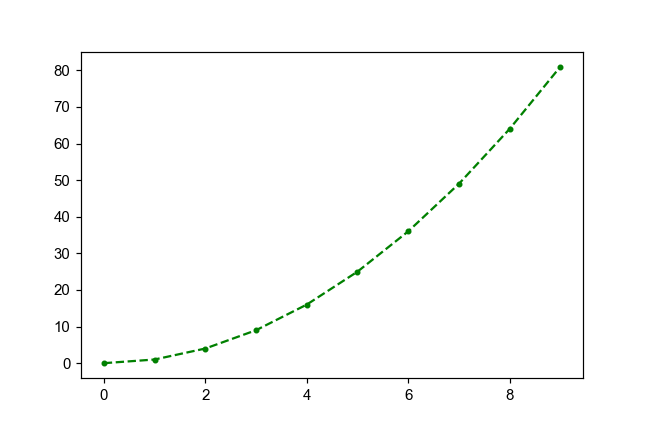

In [51]:
# line plot 스타일 지정
# 스타일 문자열은 색, 마커, 선 종류 순으로 지정하며 만약 이중 일부가 생략되면 디폴트 값이 적용됩니다.
plt.plot(x,y, 'g.--')

#### 자주 사용하는 선스타일 색상
    자주 사용되는 색깔은 한글자 약자를 사용할 수 있으며 약자는 아래 표에 정리하였습니다.
| 문자열 | 약자 |
|-|-|
| blue | `b` |
| green | `g` |
| red | `r` |
| cyan | `c` |
| magenta | `m` |
| yellow | `y` |
| black | `k` |
| white | `w` |

#### 마커
    데이터의 위치를 표기하는 기호를 마커라고 합니다.
    사용가능한 마커의 종류를 아래 정리 해두었습니다.
| 마커 문자열 | 의미 | 마커 문자열 | 의미 |
|-|-|-|-|
| `.` | point marker  | `1` | tri_down marker |
| `,` | pixel marker | `2` | tri_up marker |
| `o` | circle marker | `3` | tri_left marker |
| `v` | triangle_down marker | `4` | tri_right marker |
| `^` | triangle_up marker | `s` | square marker |
| `<` | triangle_left marker | `p` | pentagon marker |
| `>` | triangle_right marker | `*` | star marker |
| `h` | hexagon1 marker | `x` | x marker |
| `H` | hexagon2 marker | `D` | diamond marker |
| `+` | plus marker | `d` | thin_diamond marker |

#### 선 스타일
    선 스타일에는 실선(solid), 대시선(dashed), 점선(dotted), 대시-점선(dash-dit)을 사용가능합니다.

| 선 스타일 문자열 | 의미 |
|-|-|
| `-` |  solid line style
| `--` |  dashed line style
| `-.` |  dash-dot line style
| `:` |  dotted line style

#### 그래프에 옵션 추가하기
지금부터는 plt 의 다른 함수를 사용하여 보는 사람의 이해를 도울 수 있는 여러 기능들을 알아보겠습니다.
    
- `figure` : 그래프가 그려지는 캔버스 설정  
- `title` : 그래프 제목  
- `xlabel`, `ylabel` : 축 설명  
- `legend` : 범례이름  
- `xlim`, `ylim` : 축 범위  
- `xticks`, `yticks` : 축 구간 내 필요한 구간만 추리기

<IPython.core.display.Javascript object>


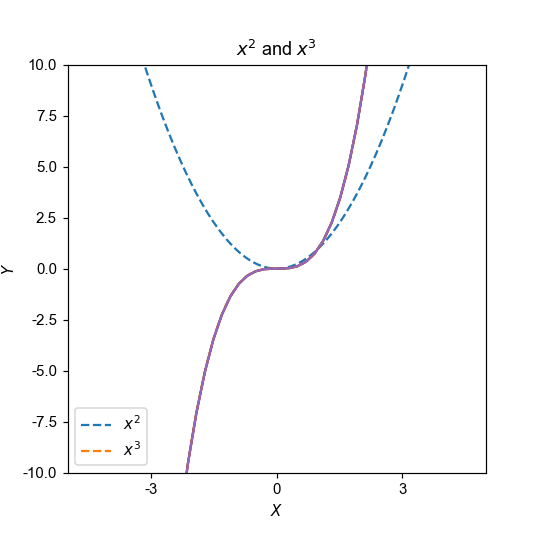

In [106]:
plt.figure(figsize=(5,5)) # 그래프 크기조정
plt.title("$x^2$ and $x^3$") # title 설정
plt.xlabel("$X$")  # x축 설명
plt.ylabel("$Y$")  # y축 설명
plt.xlim([-5,5])
plt.ylim([-10,10])
plt.xticks([-3,0,3])
plt.plot(x1,y1,'--', label='$x^2$')
plt.plot(x1, x1**3,'--',label='$x^3$')
plt.legend()  # loc 파라메터 전달로 위치 지정 (범례표시)
plt.show()  # 그림완성

#### y축에 x의 세제곱 그래프를 그려봅니다. 라인은 노랑색, 선은 실선, 마커는 없어요. 제목은 '$X^3$', plot label=''$x^3$' 범례지정도 해주세요

<IPython.core.display.Javascript object>


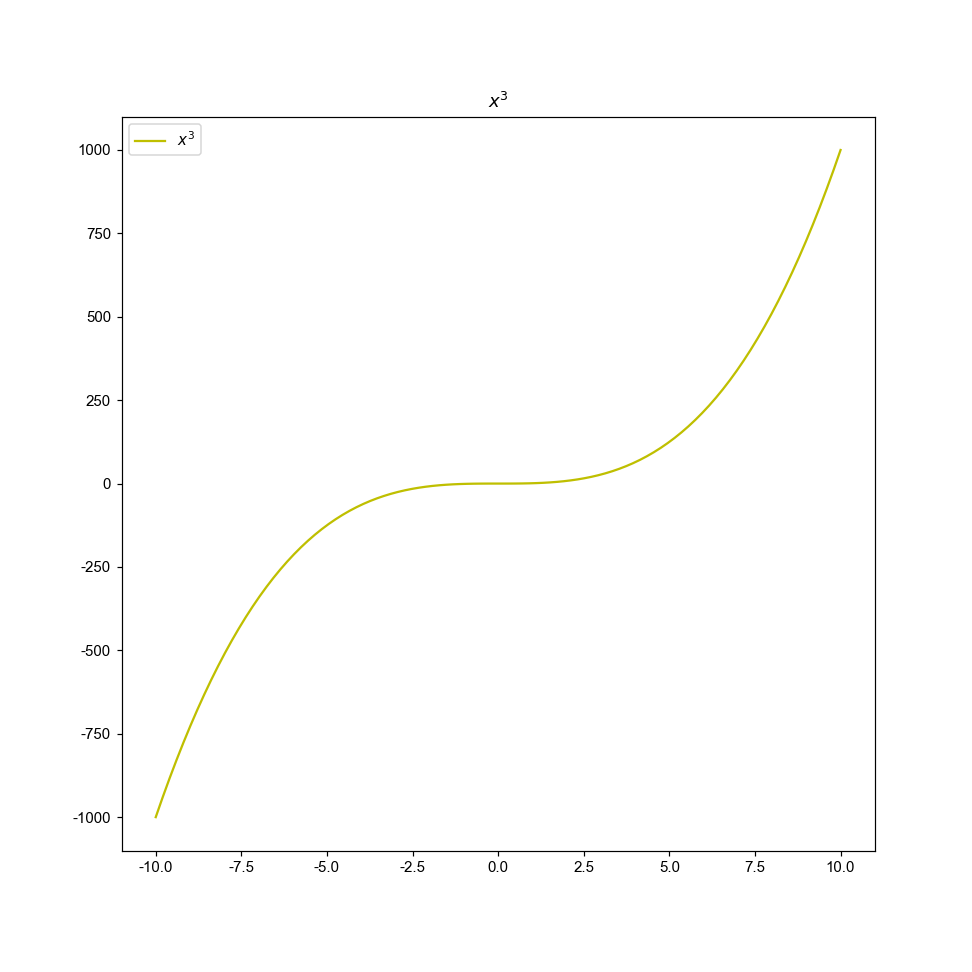

In [135]:
x = np.linspace(-10,10,100)
y = x**3
plt.figure(figsize=(9,9))
plt.plot(x,y,'y',label='$x^3$')
plt.title("$x^3$")
plt.legend()

In [ ]:
# 여러 그래프 한꺼번에 그리기
plt.figure(figsize=(10, 7))
plt.title('$x^2$ and $x^3$')
x = np.linspace(-10, 10, 300)
plt.plot(x, x*x, label='$x^2$')
plt.plot(x, x*x*x, 'r--', label='$x^3$')
plt.plot(x, np.sin(x), 'g:', label='$sin(x)$')
plt.plot(x, np.cos(x), 'k:', label='$cos(x)$')
plt.ylabel('$x^2$ and $x^3$')
plt.xlabel('x')
plt.xlim(-3, 3)
plt.ylim(-1, 1)
plt.legend(loc='best')
plt.show()

#### subplot을 사용하여 여러 그래프 한번에 그리기

In [ ]:
# 2 x 1 figure 매트릭스에 그래프 그리기

x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)
y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

plt.figure(figsize=(12, 8))

plt.subplot(211) # 도화지 나누기 2행 1열 그래프의 첫번째
plt.plot(x1, y1, 'yo-')
plt.title('A tale of 2 subplots')
plt.ylabel('Damped oscillation')

plt.subplot(212) # 도화지 나누기 2행 1열 그래프의 두번째
plt.plot(x2, y2, 'r.-')
plt.xlabel('time (s)')
plt.ylabel('Undamped')

plt.tight_layout() # 여백줄이기
plt.show()

<IPython.core.display.Javascript object>


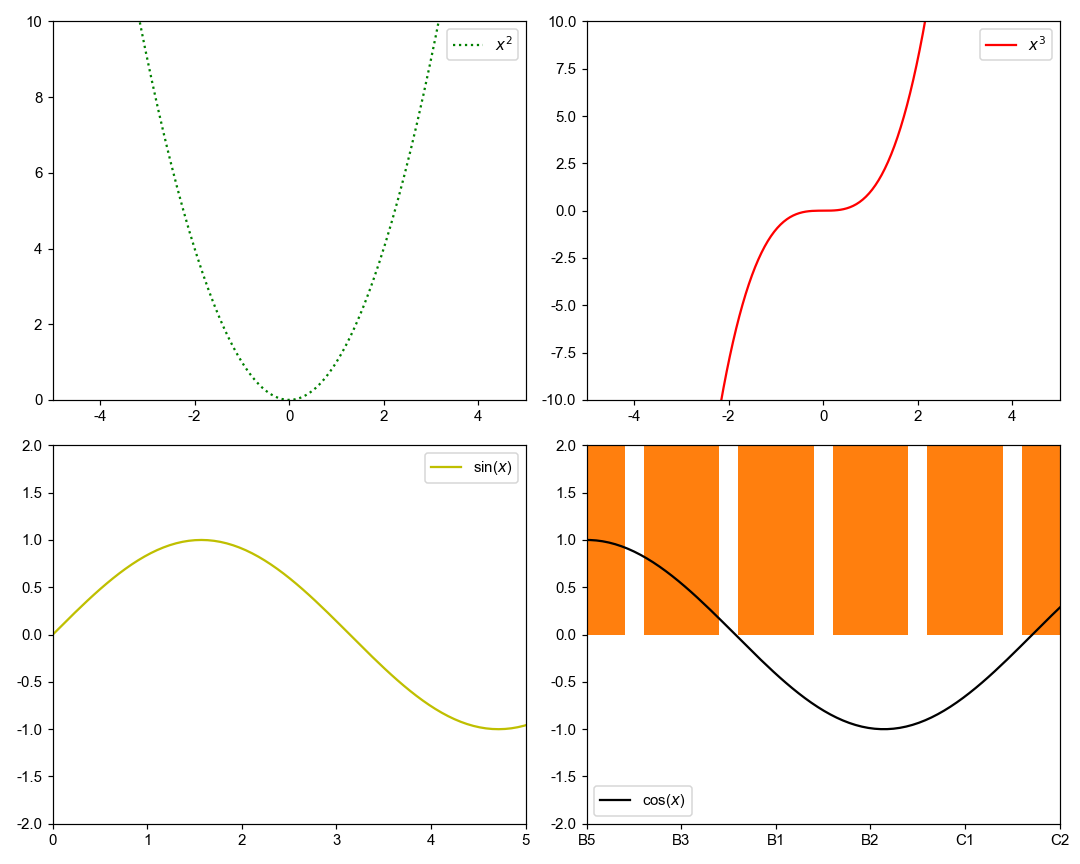

In [163]:
# 2 x 2 figure 매트릭스에 위에 그려진 제곱, 세제곱, sin, cos 그래프 나누기
# plt.figure(figsize=(10, 7))
# plt.title('$x^2$ and $x^3$')
# x = np.linspace(-10, 10, 300)
# plt.plot(x, x*x, label='$x^2$')
# plt.plot(x, x*x*x, 'r--', label='$x^3$')
# plt.plot(x, np.sin(x), 'g:', label='$sin(x)$')
# plt.plot(x, np.cos(x), 'k:', label='$cos(x)$')
# plt.ylabel('$x^2$ and $x^3$')
# plt.xlabel('x')
# plt.xlim(-3, 3)
# plt.ylim(-1, 1)
# plt.legend(loc='best')
# plt.show()

plt.figure(figsize=(10, 8))

plt.subplot(221) # 도화지를 나누는 함수 괄호안에 (도화지의 행, 도화지 열, 순서) 
plt.plot(x,x*x,'g:',label='$x^2$')
plt.xlim(-5,5)
plt.ylim(0,10)
plt.legend()

plt.subplot(222)
plt.plot(x,x*x*x,'r',label='$x^3$')
plt.xlim(-5,5)
plt.ylim(-10,10)
plt.legend()

plt.subplot(223)
plt.plot(x,np.sin(x),'y',label='sin($x$)')
plt.xlim(0,5)
plt.ylim(-2,2)
plt.legend()

plt.subplot(224)
plt.plot(x, np.cos(x),'k',label='cos($x$)')
plt.xlim(0,5)
plt.ylim(-2,2)
plt.legend()

plt.tight_layout()
plt.show()

### bar plot
> 전통적으로 bar plot은 범주형 데이터(구간이 나누어져 있는) 데이터의 갯수, 빈도를 나타내는 데 쓰였습니다.  
지난 시간 학습한 loan 데이터의 신용등급을 bar plot으로 그려보겠습니다.

In [342]:
# loan1.csv 파일 불러들이기
df= pd.read_csv('data/loan1.csv')
pd.options.display.column_space=200
# df[df.isnull()['loan_amnt'] == True]

In [343]:
pd.set_option('display.max_columns', None) 

In [240]:
# df.head()
df['sub_grade'].value_counts().sort_index().index,df['sub_grade'].value_counts().sort_index().values

(Index(['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2',
        'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4',
        'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G4', 'G5'],
       dtype='object'),
 array([ 598,  830,  967, 1064, 1002, 1338, 1309, 1356,  948, 1359, 1168,
        1134, 1104,  978,  962,  717,  635,  616,  544,  508,   91,  184,
         176,  132,  111,   69,   18,   20,   18,   12,   29,    1,    1,
           1]))

<IPython.core.display.Javascript object>


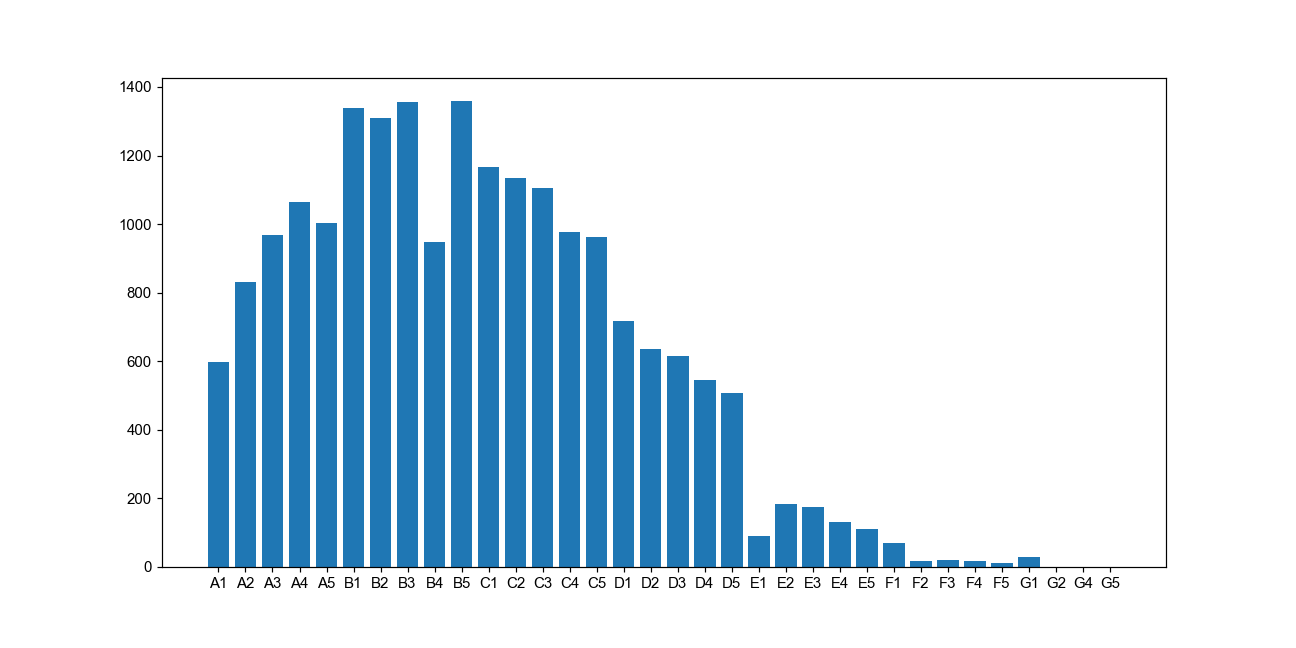

In [241]:
# 세부신용등급 각 항목별 갯수세기
plt.figure(figsize=(12,6))
plt.bar(df['sub_grade'].value_counts().sort_index().index, df['sub_grade'].value_counts().sort_index().values)
plt.show()

<IPython.core.display.Javascript object>


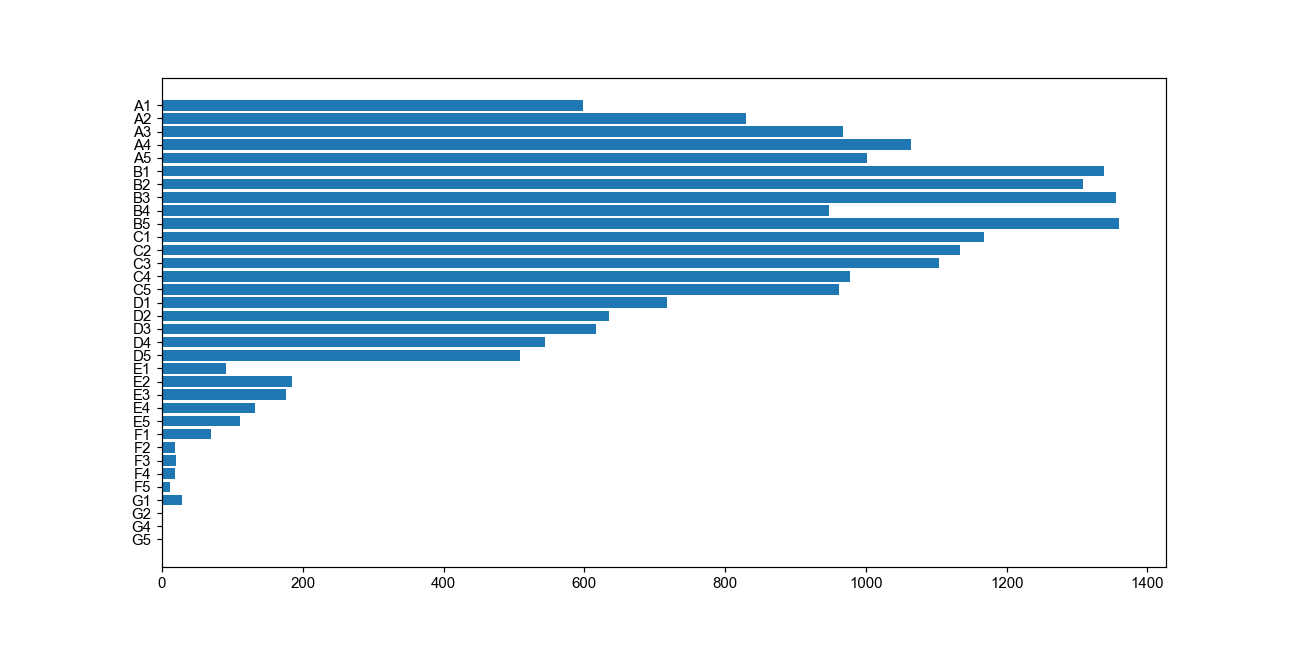

In [246]:
# 세부신용등급 barh plot
plt.figure(figsize=(12,6))
plt.barh(df['sub_grade'].value_counts().sort_index(ascending=False).index, df['sub_grade'].value_counts().sort_index(ascending=False).values)
plt.show()

### 히스토그램
> 데이터의 분포를 확인하고자 할 때 많이 사용하는 시각화 방법입니다.  
전체 데이터 구간 중 특정 구간에 속한 데이터의 빈도수를 계산하여 구간에 매칭시킵니다.    
데이터 구간별 밀도를 확인할 수 있습니다.

In [251]:
# df.head(3)
df['loan_amnt']

0        10000
1         3500
2         5000
3        14000
4         5000
         ...  
19995    10800
19996    14000
19997    35000
19998    35225
19999     3500
Name: loan_amnt, Length: 20000, dtype: int64

<IPython.core.display.Javascript object>


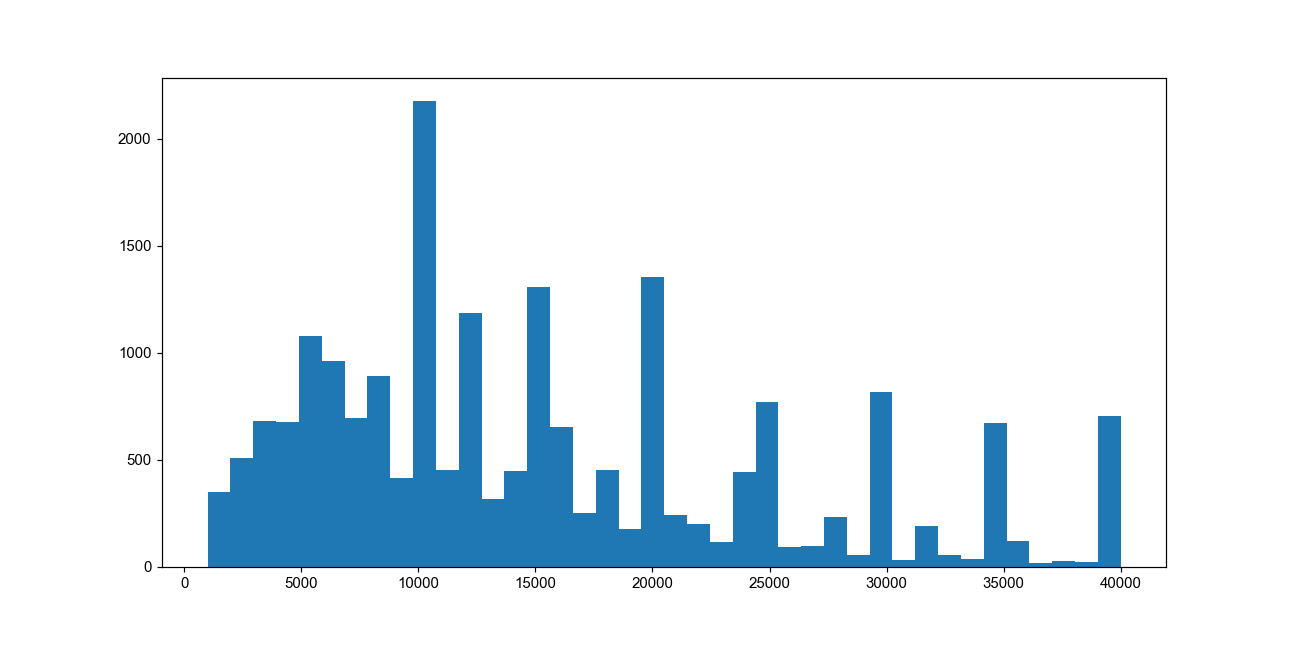

In [257]:
# 대출금액분포 hist plot으로 확인
plt.figure(figsize=(12, 6))
plt.hist(df['loan_amnt'], bins=40)
plt.show()

### scatter plot
> 2개 혹은 2개 이상의 변수간의 관계를 확인하고자 할 때 많이 사용하는 시각화 방법.  
X축과 Y축에 각각의 변수 데이터를 위치시키고 포인트들이 자리한 평면상의 분포를 통해 상관관계를 파악할 수 있습니다.

In [261]:
df[['loan_amnt', 'installment']]

,loan_amnt,installment
0,10000,320.05
1,3500,113.63
2,5000,169.90
3,14000,457.75
4,5000,169.90
...,...,...
19995,10800,345.66
19996,14000,326.34
19997,35000,789.57
19998,35225,914.34


<IPython.core.display.Javascript object>


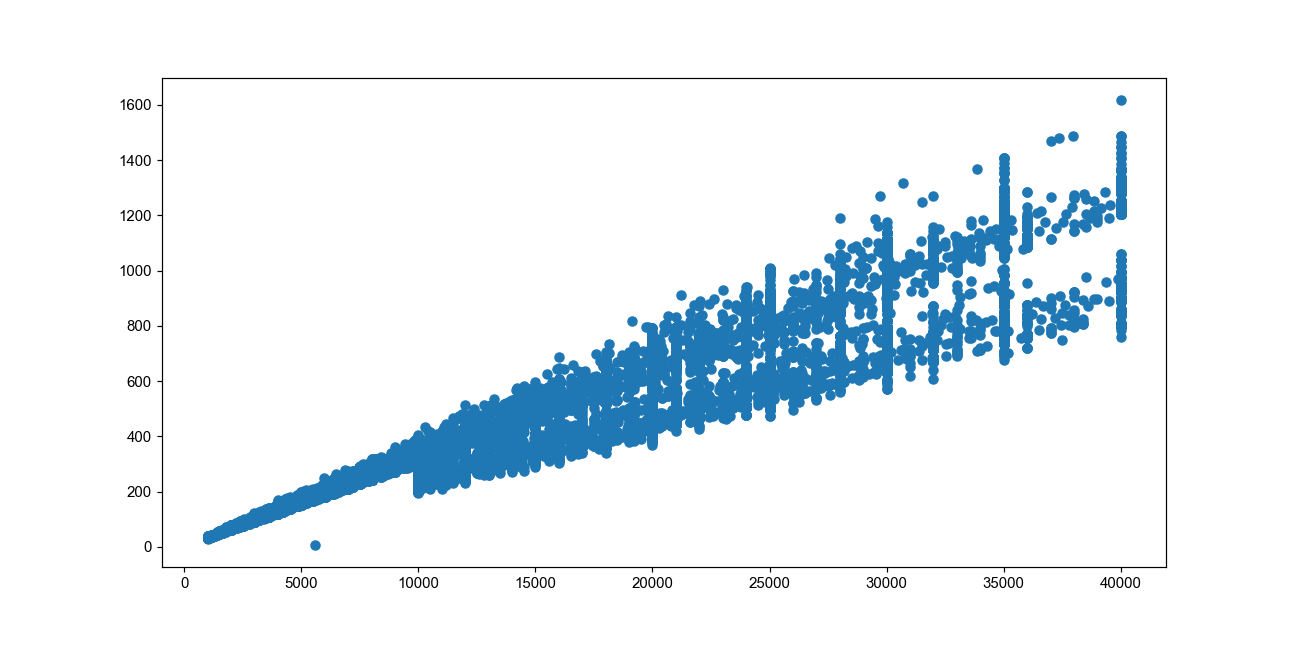

In [265]:
# 각각의 변수와 우리가 보고자 하는 값과의 관계를 볼 때 가장 많이 사용합니다.
# loan_amnt(대출금액), installment(매달 내는 원리금)
plt.figure(figsize=(12,6))
plt.scatter(df['loan_amnt'],df['installment']) # x,y축을 바꿔해서 보면 두 변수가 양의 상관관계임을 더욱 확실하게 알 수 있다
plt.show()

In [ ]:
# 5000지점을 보면 원리금이 0인 특이한 데이터가 있음 -> 오류임을 알 수 있다, pandas로 거르기

<IPython.core.display.Javascript object>


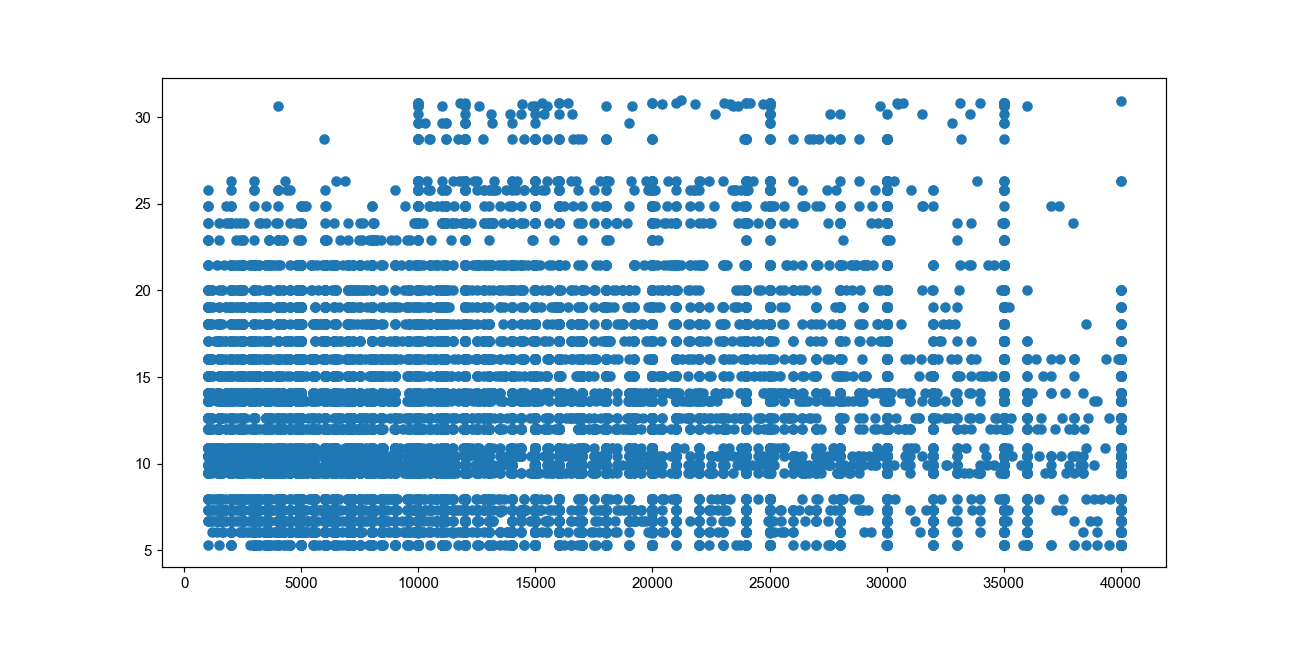

In [270]:
# 다른 변수도 확인해보자
plt.figure(figsize=(12,6))
plt.scatter(df['loan_amnt'],df['int_rate'])   # => 아무런 관계가 없는 컬럼이다
plt.show()

## matplotlib 예제 살펴보기

In [266]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,10000,10000,10000.0,36 months,9.44,320.05,B,B1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,3500,3500,3500.0,36 months,10.42,113.63,B,B3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,13.59,169.90,C,C2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,14000,14000,14000.0,36 months,10.91,457.75,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,5000,5000,5000.0,36 months,13.59,169.90,C,C2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>


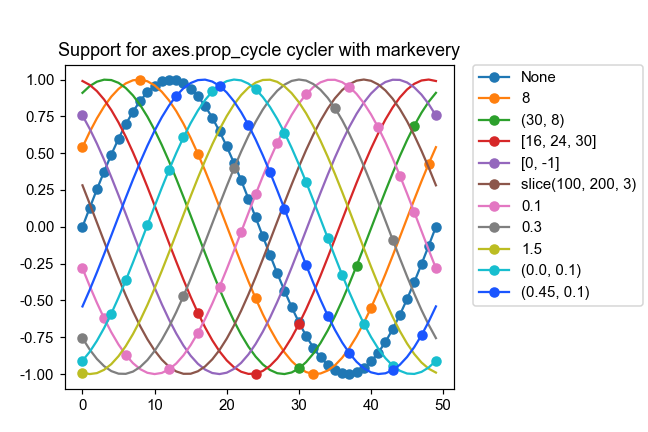

In [271]:
from cycler import cycler
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# Define a list of markevery cases and color cases to plot
cases = [None,
         8,
         (30, 8),
         [16, 24, 30],
         [0, -1],
         slice(100, 200, 3),
         0.1,
         0.3,
         1.5,
         (0.0, 0.1),
         (0.45, 0.1)]

colors = ['#1f77b4',
          '#ff7f0e',
          '#2ca02c',
          '#d62728',
          '#9467bd',
          '#8c564b',
          '#e377c2',
          '#7f7f7f',
          '#bcbd22',
          '#17becf',
          '#1a55FF']

# Configure rcParams axes.prop_cycle to simultaneously cycle cases and colors.
mpl.rcParams['axes.prop_cycle'] = cycler(markevery=cases, color=colors)

# Create data points and offsets
x = np.linspace(0, 2 * np.pi)
offsets = np.linspace(0, 2 * np.pi, 11, endpoint=False)
yy = np.transpose([np.sin(x + phi) for phi in offsets])

# Set the plot curve with markers and a title
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.6, 0.75])

for i in range(len(cases)):
    ax.plot(yy[:, i], marker='o', label=str(cases[i]))
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.title('Support for axes.prop_cycle cycler with markevery')

plt.show()

<IPython.core.display.Javascript object>


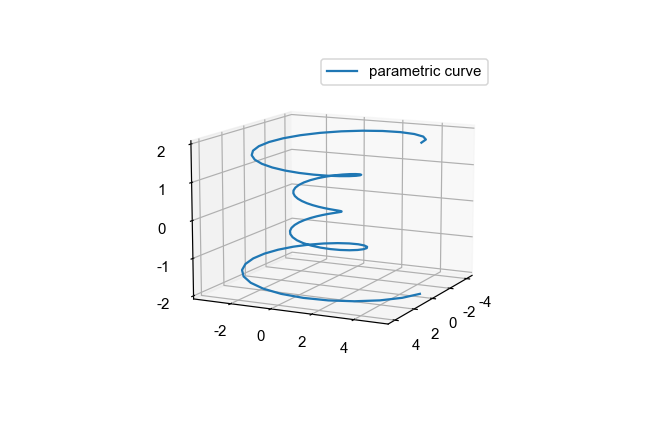

In [277]:
# 3차원 표현 옵션
%matplotlib notebook
# %matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib notebook # 3D plot을 인터랙티브하게 움직일 수 있도록 주피터노트북 설정
# %matplotlib inline # plot크기를 주피터 노트북에 알맞게(크기에 벗어나지 않게 그려줌)

plt.rcParams['legend.fontsize'] = 10

fig = plt.figure()
ax = fig.gca(projection='3d')

# Prepare arrays x, y, z
theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
z = np.linspace(-2, 2, 100)
r = z**2 + 1
x = r * np.sin(theta)
y = r * np.cos(theta)

ax.plot(x, y, z, label='parametric curve')
ax.legend()

plt.show()

<IPython.core.display.Javascript object>


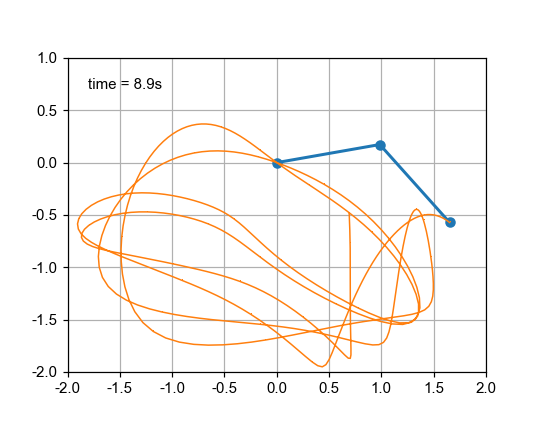

In [284]:
# 코랩이 아닌 환경에서는 애니메이션 효과도 지원함
from numpy import sin, cos
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import matplotlib.animation as animation
from collections import deque
%matplotlib notebook

G = 9.8  # acceleration due to gravity, in m/s^2
L1 = 1.0  # length of pendulum 1 in m
L2 = 1.0  # length of pendulum 2 in m
L = L1 + L2  # maximal length of the combined pendulum
M1 = 1.0  # mass of pendulum 1 in kg
M2 = 1.0  # mass of pendulum 2 in kg
t_stop = 5  # how many seconds to simulate
history_len = 500  # how many trajectory points to display


def derivs(state, t):

    dydx = np.zeros_like(state)
    dydx[0] = state[1]

    delta = state[2] - state[0]
    den1 = (M1+M2) * L1 - M2 * L1 * cos(delta) * cos(delta)
    dydx[1] = ((M2 * L1 * state[1] * state[1] * sin(delta) * cos(delta)
                + M2 * G * sin(state[2]) * cos(delta)
                + M2 * L2 * state[3] * state[3] * sin(delta)
                - (M1+M2) * G * sin(state[0]))
               / den1)

    dydx[2] = state[3]

    den2 = (L2/L1) * den1
    dydx[3] = ((- M2 * L2 * state[3] * state[3] * sin(delta) * cos(delta)
                + (M1+M2) * G * sin(state[0]) * cos(delta)
                - (M1+M2) * L1 * state[1] * state[1] * sin(delta)
                - (M1+M2) * G * sin(state[2]))
               / den2)

    return dydx

# create a time array from 0..t_stop sampled at 0.02 second steps
dt = 0.02
t = np.arange(0, t_stop, dt)

# th1 and th2 are the initial angles (degrees)
# w10 and w20 are the initial angular velocities (degrees per second)
th1 = 120.0
w1 = 0.0
th2 = -10.0
w2 = 0.0

# initial state
state = np.radians([th1, w1, th2, w2])

# integrate your ODE using scipy.integrate.
y = integrate.odeint(derivs, state, t)

x1 = L1*sin(y[:, 0])
y1 = -L1*cos(y[:, 0])

x2 = L2*sin(y[:, 2]) + x1
y2 = -L2*cos(y[:, 2]) + y1

fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(autoscale_on=False, xlim=(-L, L), ylim=(-L, 1.))
ax.set_aspect('equal')
ax.grid()

line, = ax.plot([], [], 'o-', lw=2)
trace, = ax.plot([], [], ',-', lw=1)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)
history_x, history_y = deque(maxlen=history_len), deque(maxlen=history_len)


def animate(i):
    thisx = [0, x1[i], x2[i]]
    thisy = [0, y1[i], y2[i]]

    if i == 0:
        history_x.clear()
        history_y.clear()

    history_x.appendleft(thisx[2])
    history_y.appendleft(thisy[2])

    line.set_data(thisx, thisy)
    trace.set_data(history_x, history_y)
    time_text.set_text(time_template % (i*dt))
    return line, trace, time_text


ani = animation.FuncAnimation(
    fig, animate, len(y), interval=dt*1000, blit=True)
plt.show()

## **seaborn**
> 많은 데이터분석가들이 주로 사용하는 시각화 라이브러리  
matplotlib에 비해 기본적인 시각적 심미성이 뛰어납니다.  
matplotlib에서 지원하지 않는 다양한 형태의 시각화도구를 제공.

In [285]:
# 패키지 설치
# !pip install seaborn

# 패키지 import
import seaborn as sns

### barplot

<IPython.core.display.Javascript object>


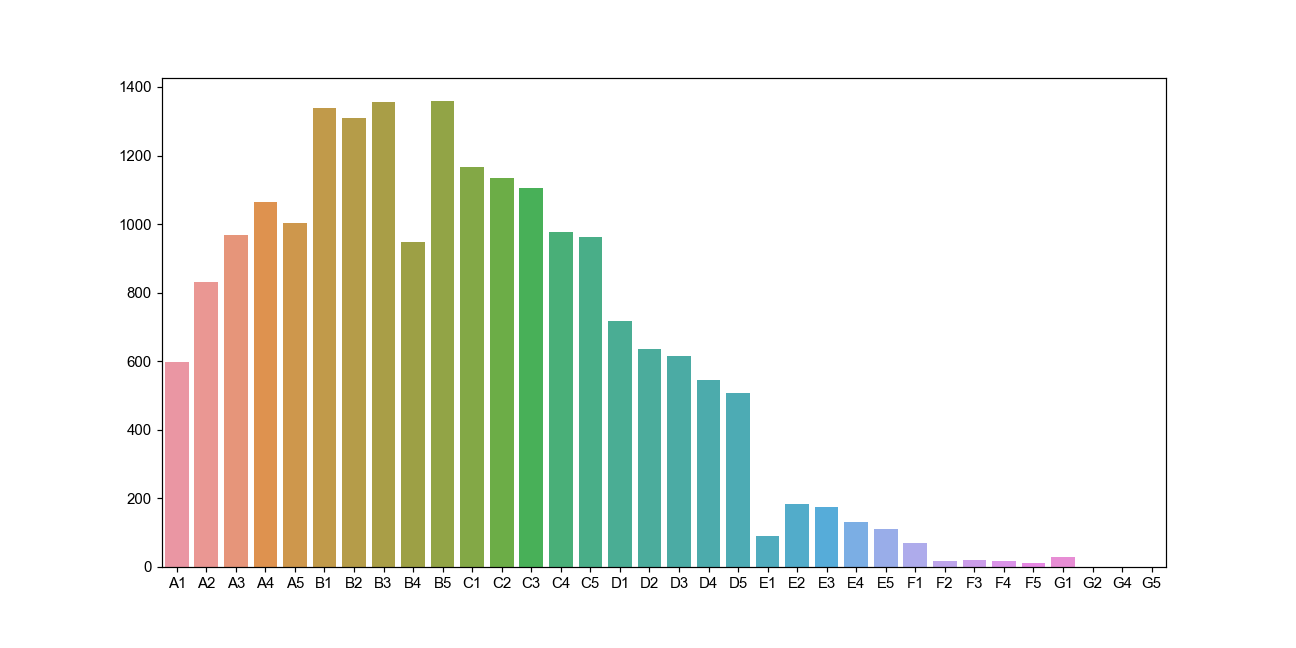

/Users/ppangppang/opt/anaconda3/envs/ppangppang/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


In [287]:
plt.figure(figsize=(12,6))
# plt.bar(df['sub_grade'].value_counts().sort_index().index, df['sub_grade'].value_counts().sort_index().values)
sns.barplot(df['sub_grade'].value_counts().sort_index().index, df['sub_grade'].value_counts().sort_index().values)
plt.show()

### countplot

<IPython.core.display.Javascript object>


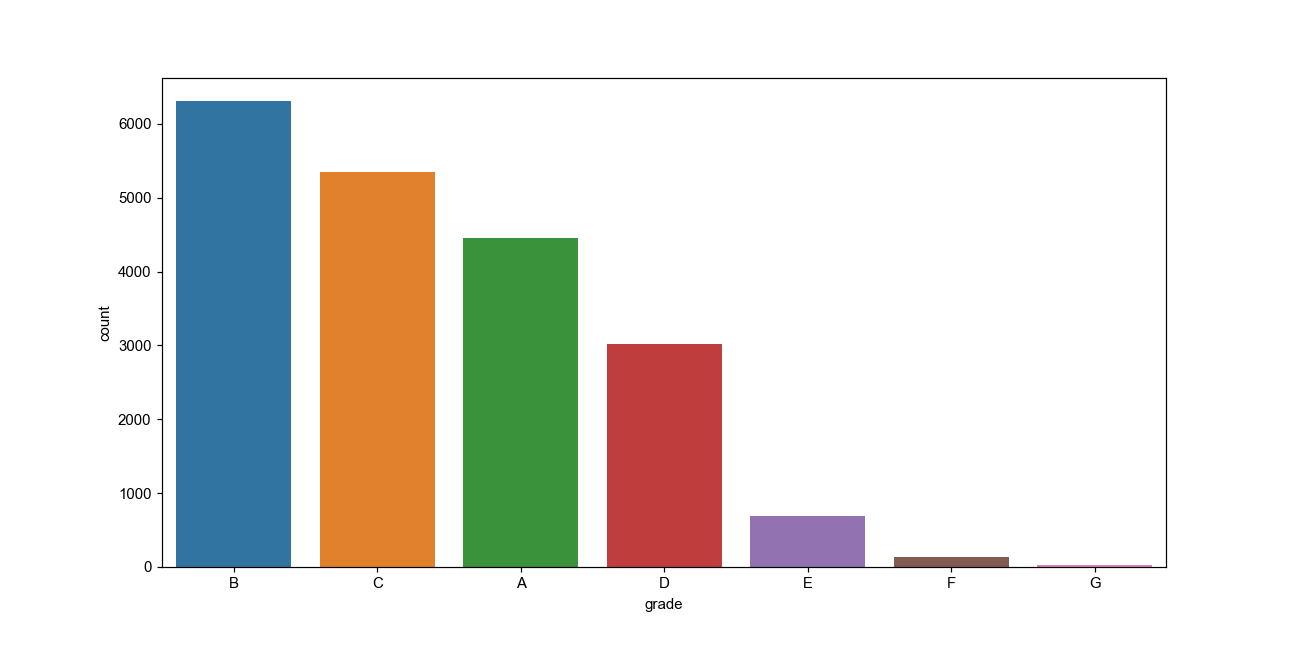

/Users/ppangppang/opt/anaconda3/envs/ppangppang/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


In [288]:
# 쉬운 방법으로 barplot 구현이 가능하다.
plt.figure(figsize=(12,6))
# plt.bar(df['sub_grade'].value_counts().sort_index().index, df['sub_grade'].value_counts().sort_index().values)
sns.countplot(df['grade']) # 표현식이 간단하지만, 정렬등의 옵션을 적용하기 어렵다
plt.show()

### distplot(히스토그램)

<IPython.core.display.Javascript object>


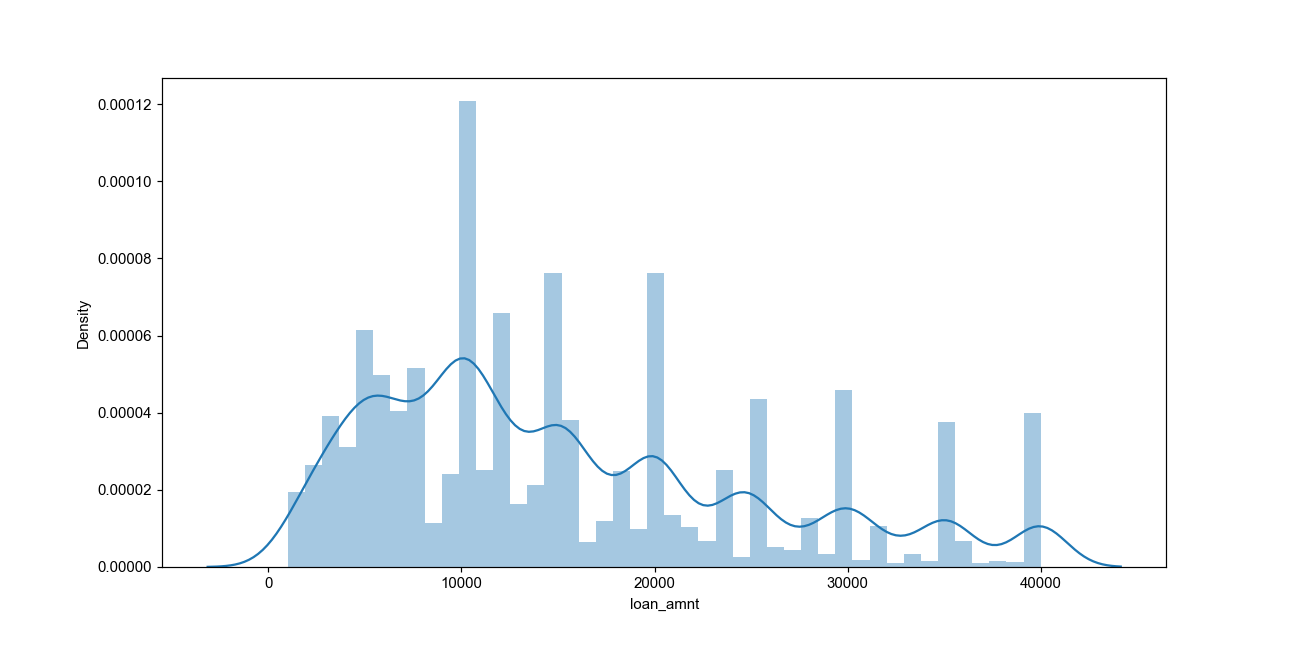

In [291]:
plt.figure(figsize=(12,6))
# plt.bar(df['sub_grade'].value_counts().sort_index().index, df['sub_grade'].value_counts().sort_index().values)
sns.distplot(df['loan_amnt'])
plt.show()

### scatterplot

<IPython.core.display.Javascript object>


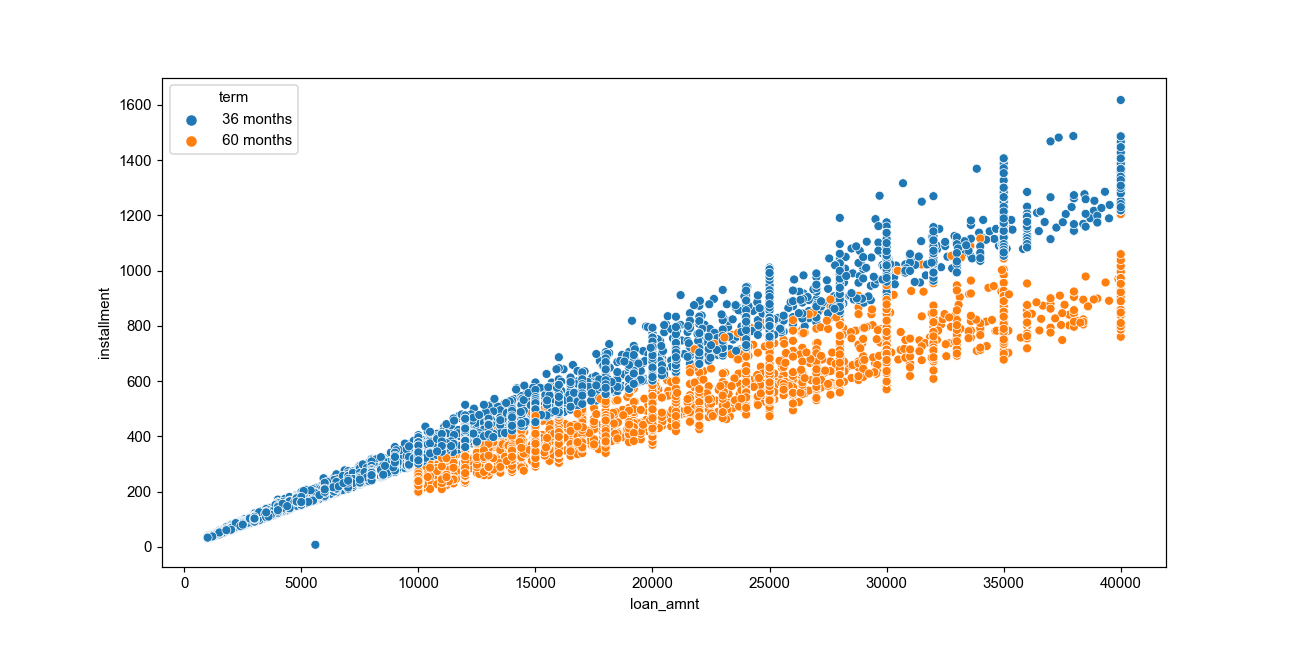

/Users/ppangppang/opt/anaconda3/envs/ppangppang/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan_amnt', ylabel='installment'>

In [296]:
plt.figure(figsize=(12, 6))
sns.scatterplot(df['loan_amnt'],df['installment'],df['term'],hue='term')

<IPython.core.display.Javascript object>


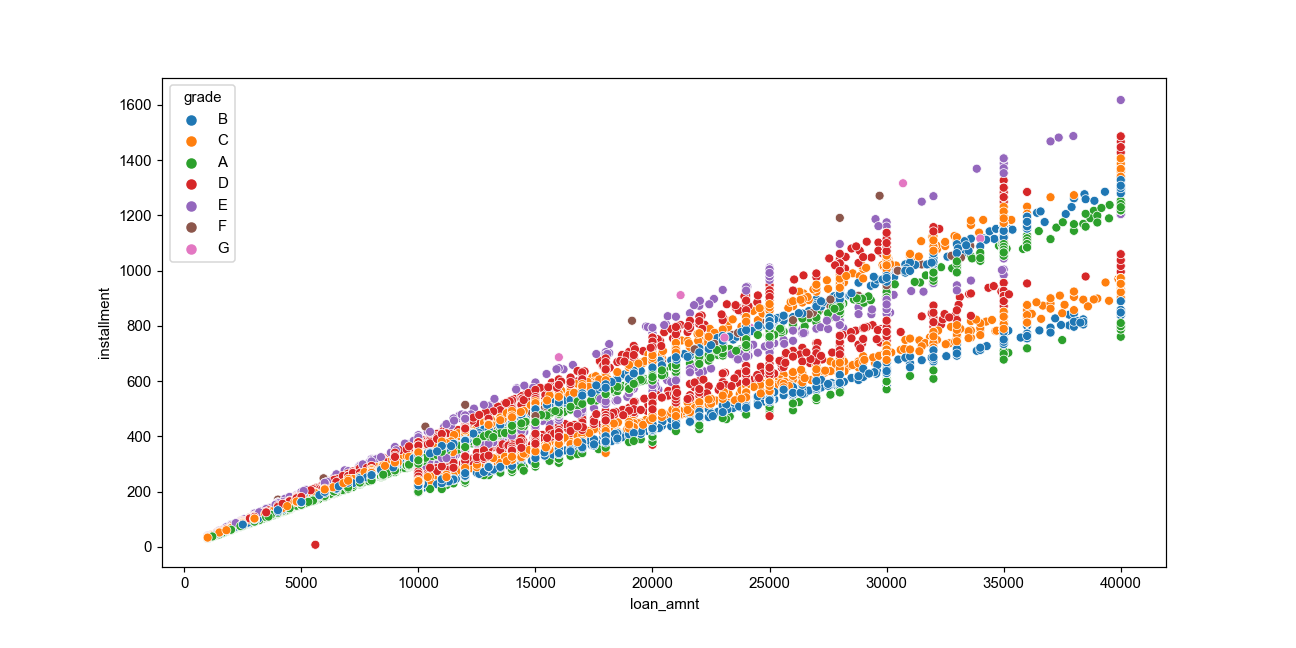

/Users/ppangppang/opt/anaconda3/envs/ppangppang/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan_amnt', ylabel='installment'>

In [323]:
plt.figure(figsize=(12, 6))
sns.scatterplot(df['loan_amnt'],df['installment'],hue=df['grade'])

<IPython.core.display.Javascript object>


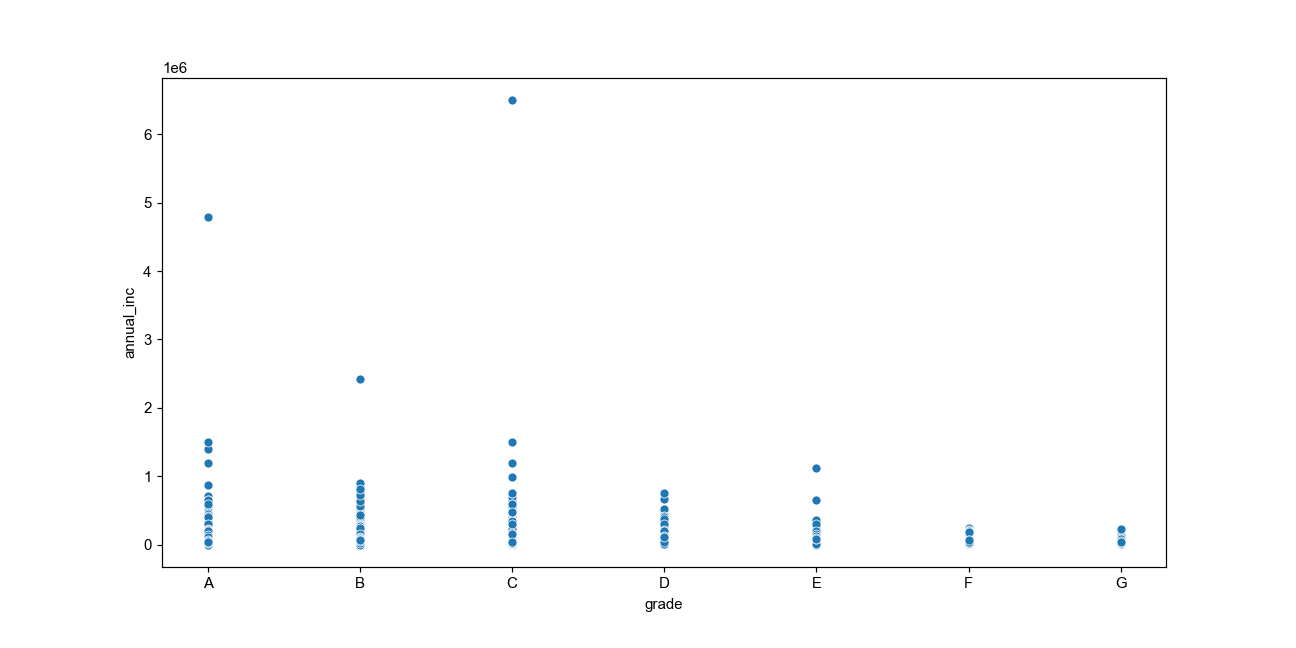

/Users/ppangppang/opt/anaconda3/envs/ppangppang/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


In [306]:
plt.figure(figsize=(12, 6))
sns.scatterplot(df.sort_values('grade')['grade'], df.sort_values('grade')['annual_inc'])
plt.show()

### boxplot

<IPython.core.display.Javascript object>


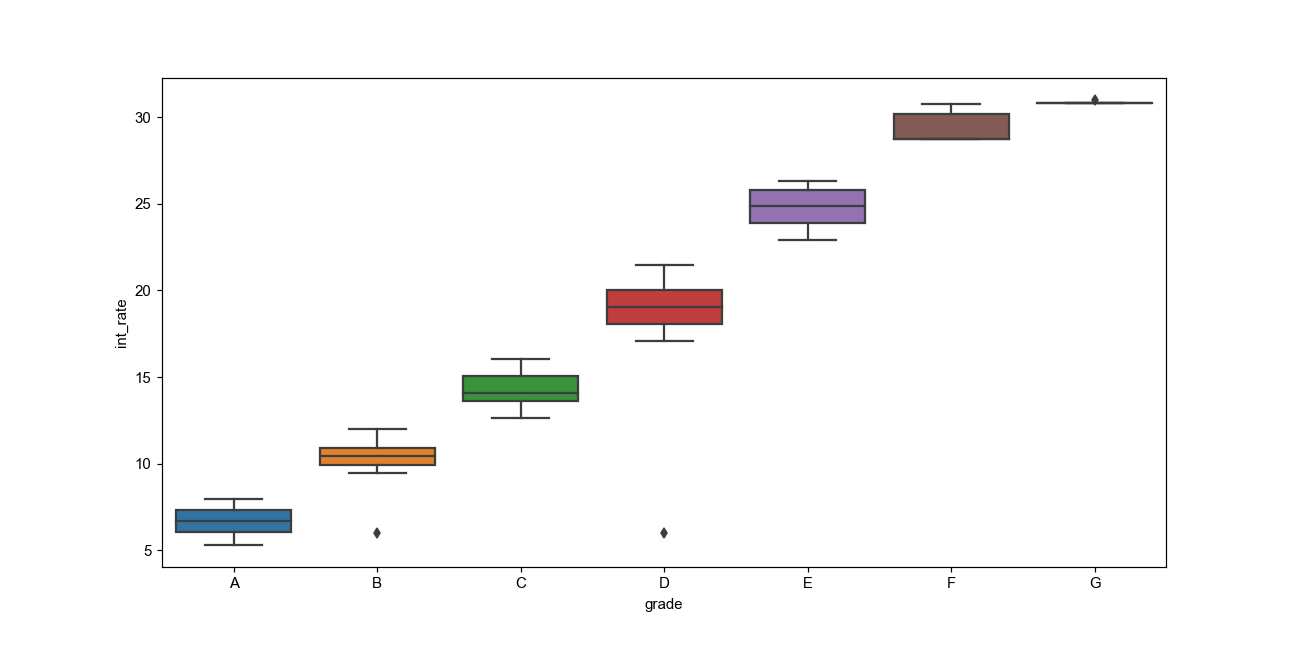

/Users/ppangppang/opt/anaconda3/envs/ppangppang/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='grade', ylabel='int_rate'>

In [311]:
# 굉장히 많이 사용
# 각각의 box하나당 해당 데이터의 사분위수, 중앙값, 최대, 최소값을 표기한다.
plt.figure(figsize=(12, 6))
sns.boxplot(df.sort_values('grade')['grade'],df['int_rate'])
# 각 등급별 이자율이 겹치는 부분이 없음

### jointplot

<IPython.core.display.Javascript object>


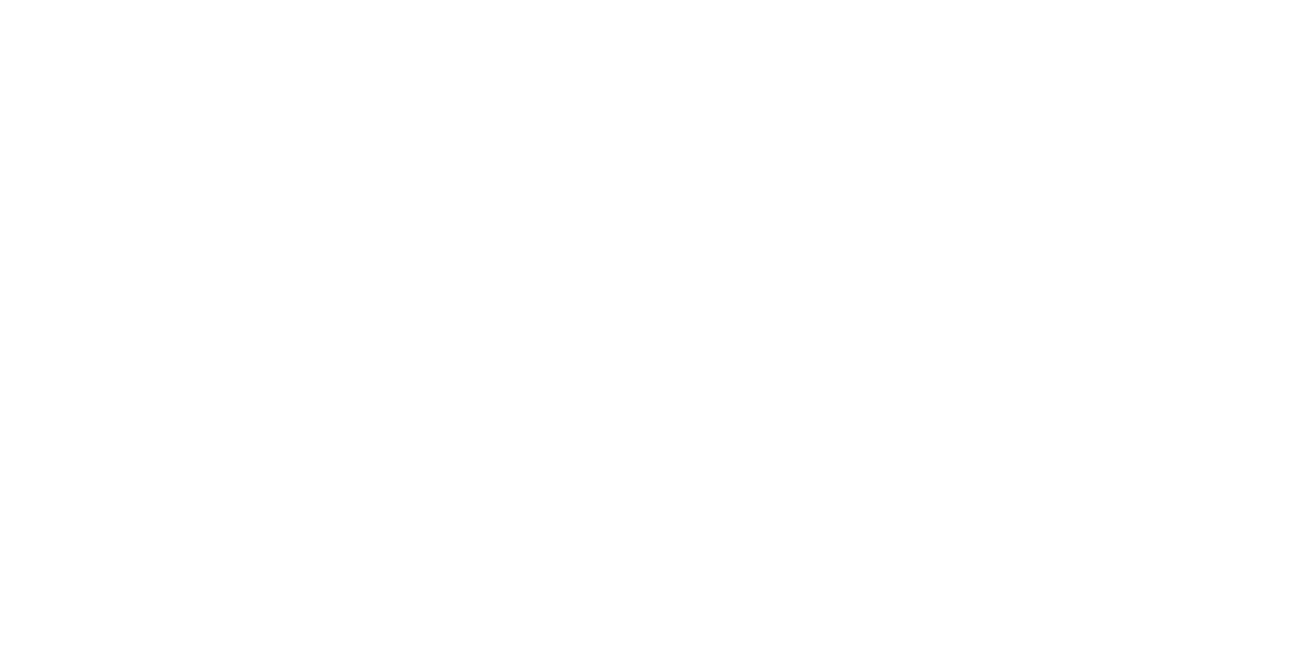

<IPython.core.display.Javascript object>


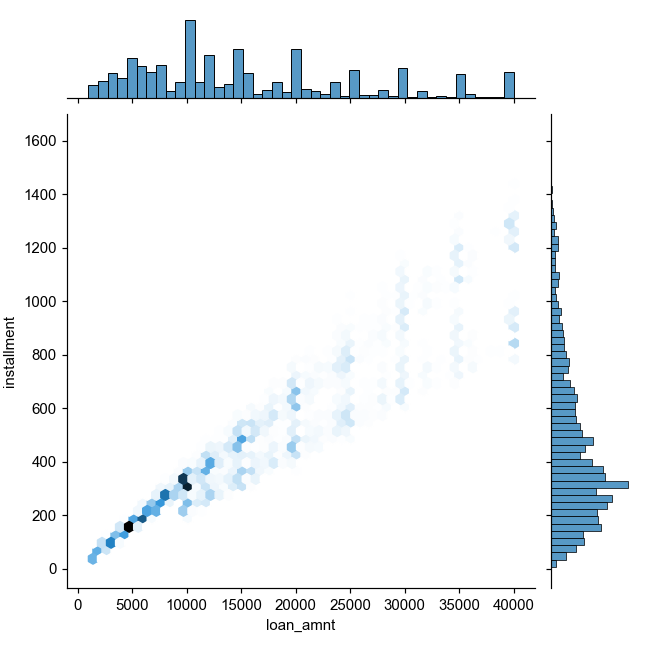

In [319]:
# loan_amnt, int_rate의 scatter plot + hist plot의 결합형태인 joint plot
plt.figure(figsize=(12, 6))
sns.jointplot(df['loan_amnt'],df['installment'],kind='hex')

<IPython.core.display.Javascript object>


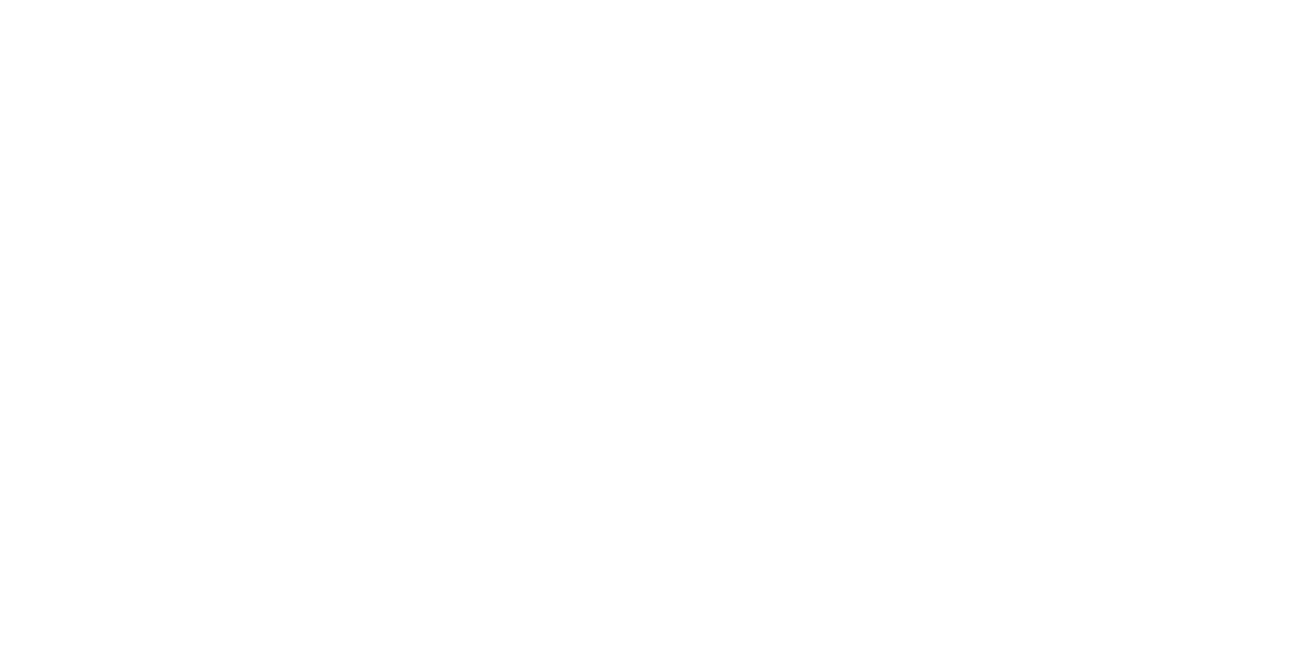

/Users/ppangppang/opt/anaconda3/envs/ppangppang/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>


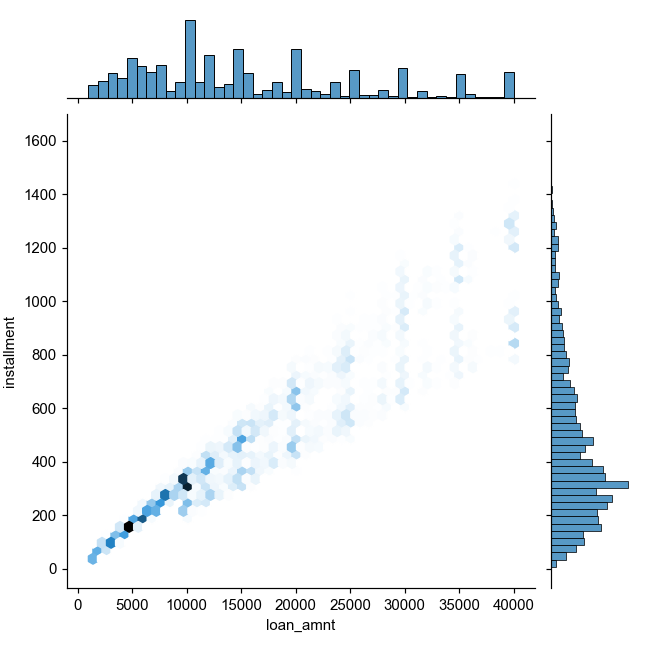

In [326]:
plt.figure(figsize=(12, 6))
sns.jointplot(df['loan_amnt'],df['installment'],kind='hex')

In [331]:
pair_df = df[['loan_amnt', 'int_rate', 'installment']]

### pairplot

<IPython.core.display.Javascript object>


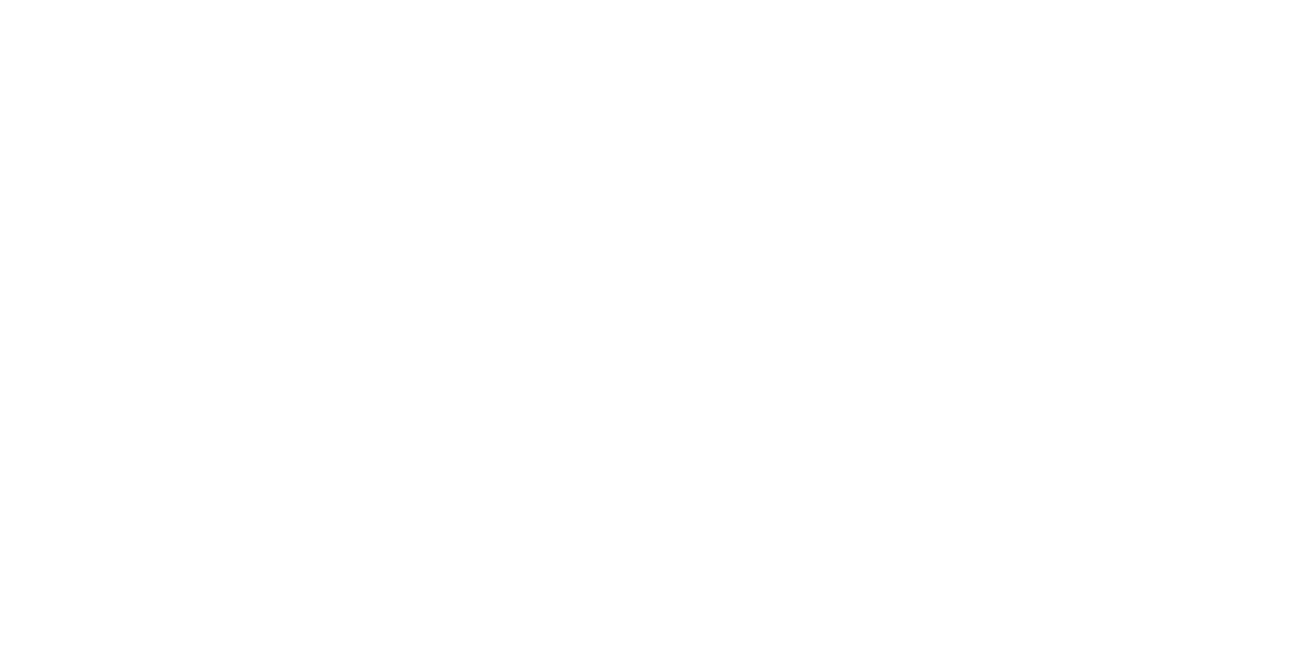

<IPython.core.display.Javascript object>


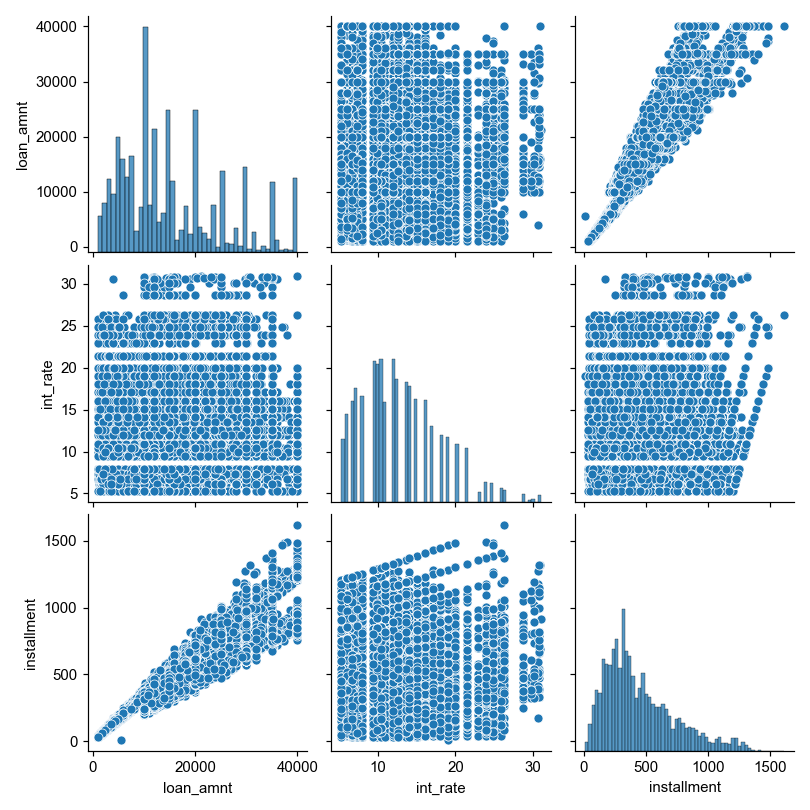

In [334]:
# 각 컬럼간 모든 scatter plot을 그리는 pairplot
plt.figure(figsize=(12, 6))
sns.pairplot(pair_df)

<IPython.core.display.Javascript object>


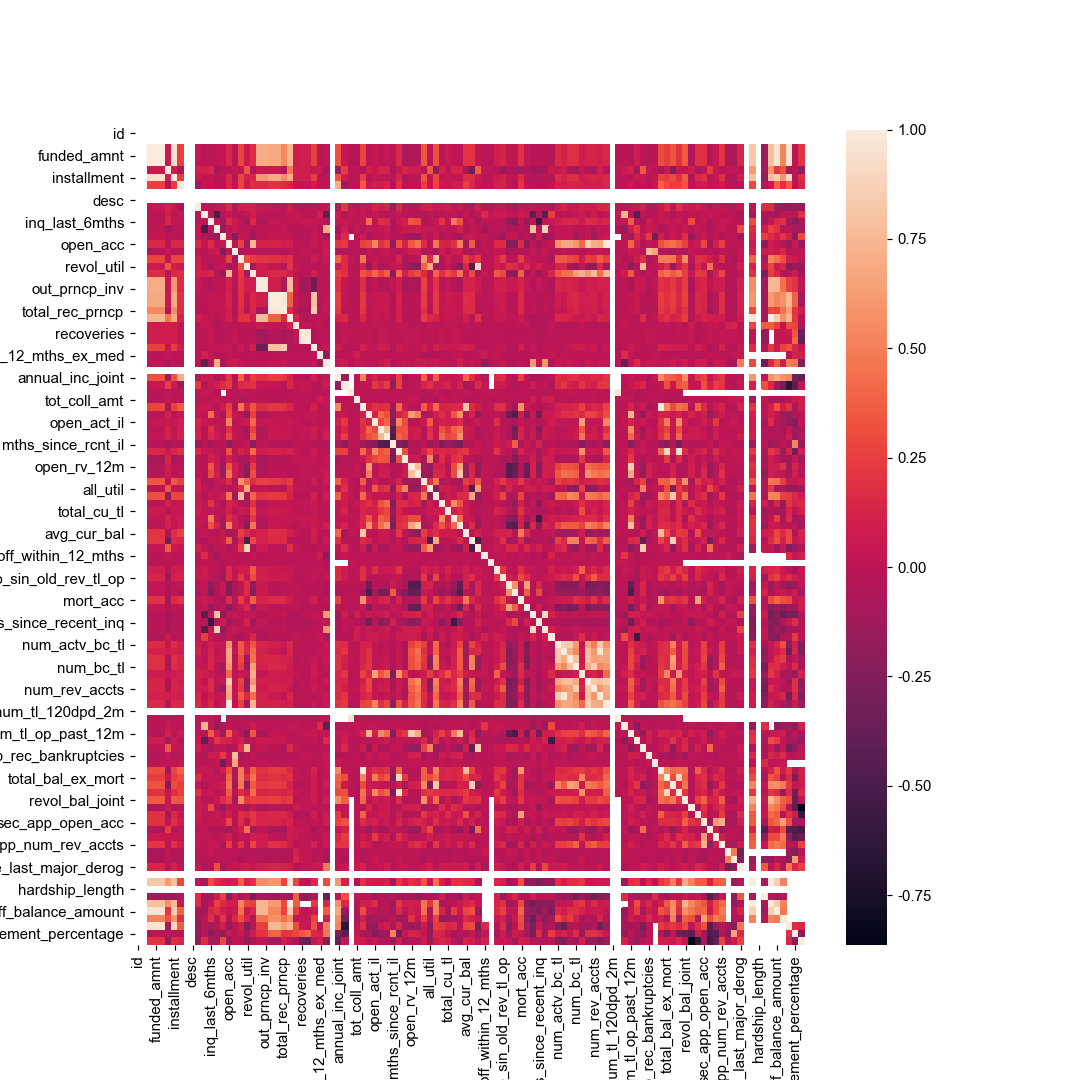

<AxesSubplot:>

In [335]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())